# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics 
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

# Importing the dataset

In [2]:
data = pd.read_csv("weatherAUS.csv")

# Analyze the data

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,32398.000000,32527.000000,32210.000000,13825.000000,9380.000000,28034.000000,32068.000000,31422.000000,32231.000000,31567.000000,26213.000000,26217.000000,17086.000000,16757.000000,32460.000000,31792.000000
mean,13.222822,24.002456,2.641763,5.614676,7.623433,37.353285,12.062679,16.570269,70.604635,52.355466,1018.256934,1015.671594,4.316282,4.425554,17.773512,22.540001
std,5.802436,6.003521,9.382993,4.537946,3.756077,13.339965,8.970039,8.929861,17.598010,20.630676,6.602430,6.533977,2.951712,2.720294,5.353359,5.849270
min,-4.800000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000
25%,8.900000,19.500000,0.000000,3.000000,5.100000,28.000000,6.000000,9.000000,59.000000,37.000000,1013.900000,1011.300000,1.000000,2.000000,14.000000,18.200000
50%,13.900000,23.400000,0.000000,4.600000,8.700000,35.000000,11.000000,15.000000,71.000000,53.000000,1018.300000,1015.700000,5.000000,5.000000,18.300000,21.900000
75%,17.900000,27.600000,0.600000,7.200000,10.500000,44.000000,19.000000,22.000000,84.000000,67.000000,1022.700000,1020.100000,7.000000,7.000000,21.700000,26.100000
max,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,9.000000,8.000000,37.700000,46.700000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32897 entries, 0 to 32896
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           32897 non-null  object 
 1   Location       32897 non-null  object 
 2   MinTemp        32398 non-null  float64
 3   MaxTemp        32527 non-null  float64
 4   Rainfall       32210 non-null  float64
 5   Evaporation    13825 non-null  float64
 6   Sunshine       9380 non-null   float64
 7   WindGustDir    28030 non-null  object 
 8   WindGustSpeed  28034 non-null  float64
 9   WindDir9am     28429 non-null  object 
 10  WindDir3pm     30797 non-null  object 
 11  WindSpeed9am   32068 non-null  float64
 12  WindSpeed3pm   31422 non-null  float64
 13  Humidity9am    32231 non-null  float64
 14  Humidity3pm    31567 non-null  float64
 15  Pressure9am    26213 non-null  float64
 16  Pressure3pm    26217 non-null  float64
 17  Cloud9am       17086 non-null  float64
 18  Cloud3

In [6]:
data.shape

(32897, 23)

In [7]:
data.duplicated().sum()

0

In [8]:
data.nunique()

Date             3344
Location           11
MinTemp           325
MaxTemp           381
Rainfall          462
Evaporation       262
Sunshine          140
WindGustDir        16
WindGustSpeed      58
WindDir9am         16
WindDir3pm         16
WindSpeed9am       39
WindSpeed3pm       39
Humidity9am        97
Humidity3pm       100
Pressure9am       428
Pressure3pm       431
Cloud9am           10
Cloud3pm            9
Temp9am           343
Temp3pm           377
RainToday           2
RainTomorrow        2
dtype: int64

In [9]:
#target count

data.RainTomorrow.value_counts()

No     25050
Yes     7160
Name: RainTomorrow, dtype: int64

# Visualization

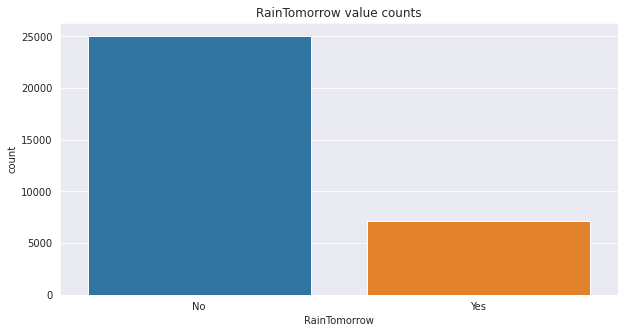

In [10]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.title('RainTomorrow value counts')
sns.countplot(x=data["RainTomorrow"]);

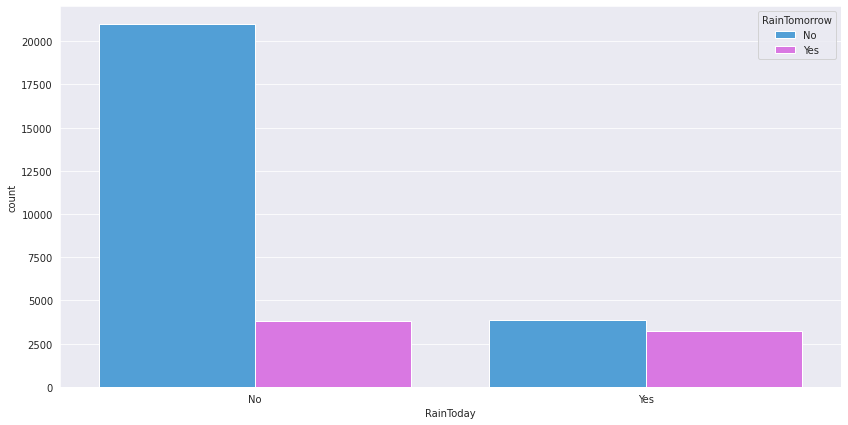

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(x=data["RainToday"], hue=data["RainTomorrow"], palette=sns.color_palette("husl")[4:]);

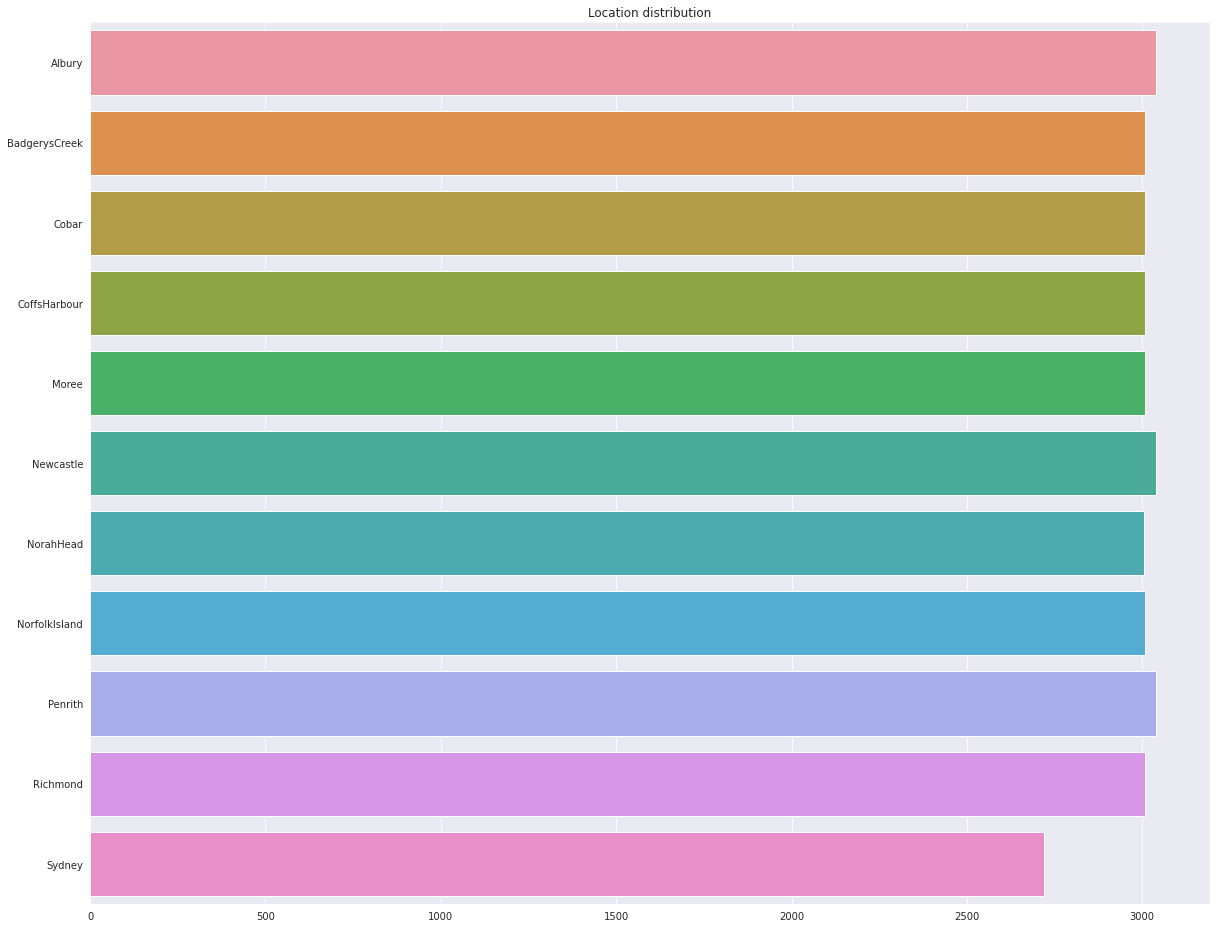

In [12]:
plt.figure(figsize=(17,13))
sns.countplot(data=data, y='Location')

plt.title('Location distribution')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

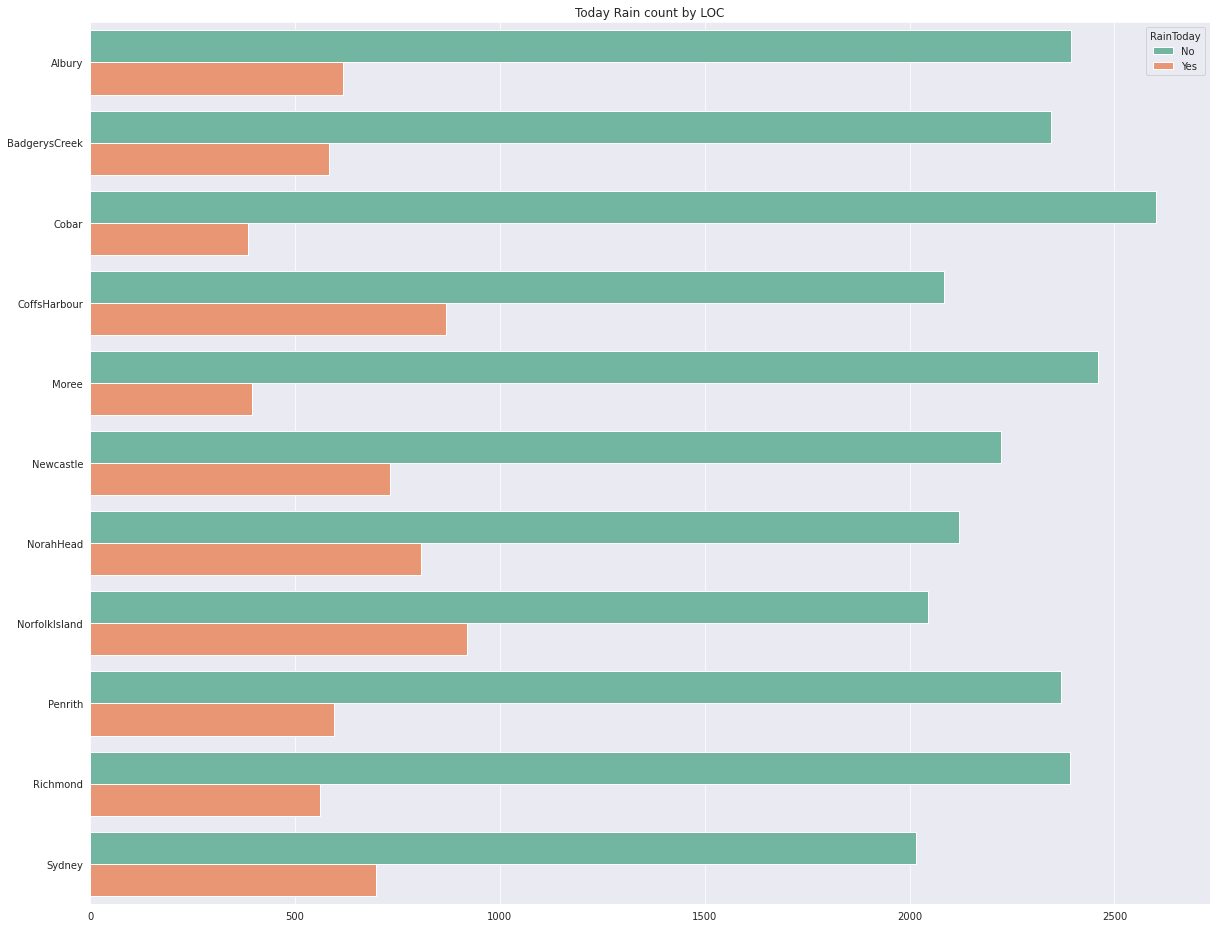

In [13]:
plt.figure(figsize=(17,13))
sns.countplot(data=data, y='Location', hue="RainToday", palette=sns.color_palette("Set2"))

plt.title('Today Rain count by LOC')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

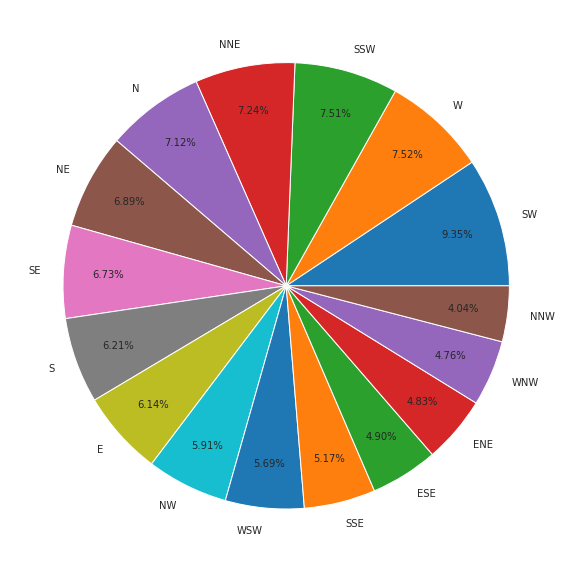

In [14]:
plt.figure(figsize=(10,11))
plt.pie(data["WindDir9am"].value_counts(),
        labels=list(data["WindDir9am"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

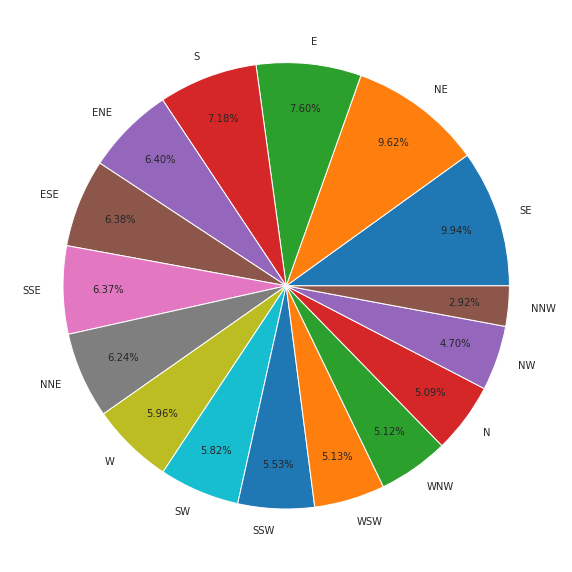

In [15]:
plt.figure(figsize=(10,11))
plt.pie(data["WindDir3pm"].value_counts(),
        labels=list(data["WindDir3pm"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

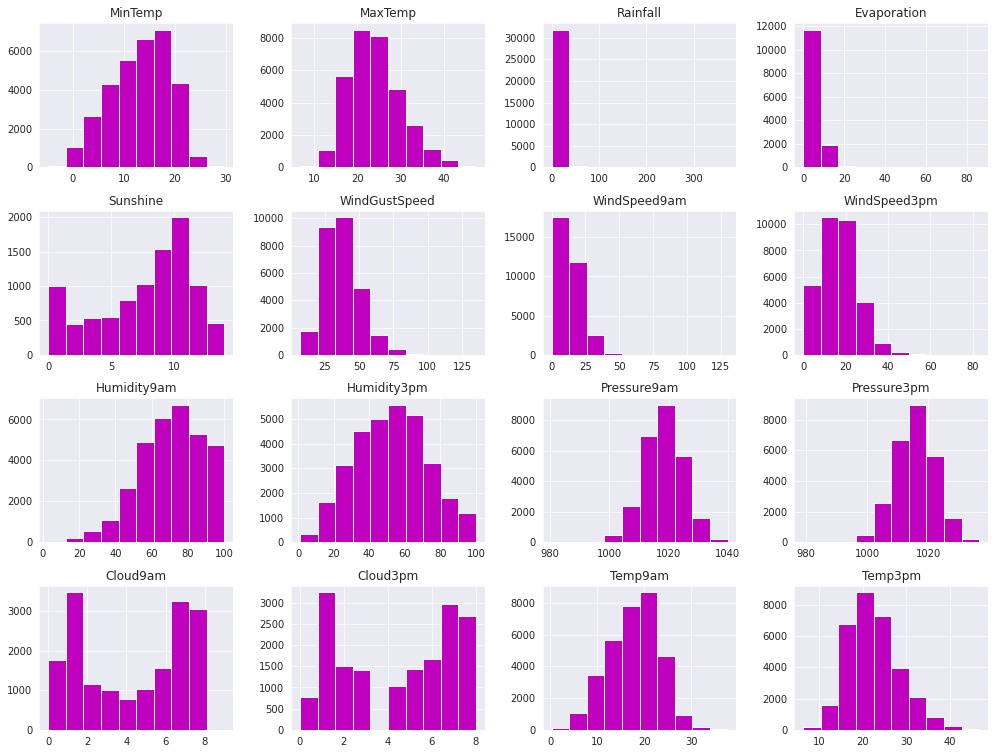

In [16]:
data.hist(figsize=(17,13), color="m");

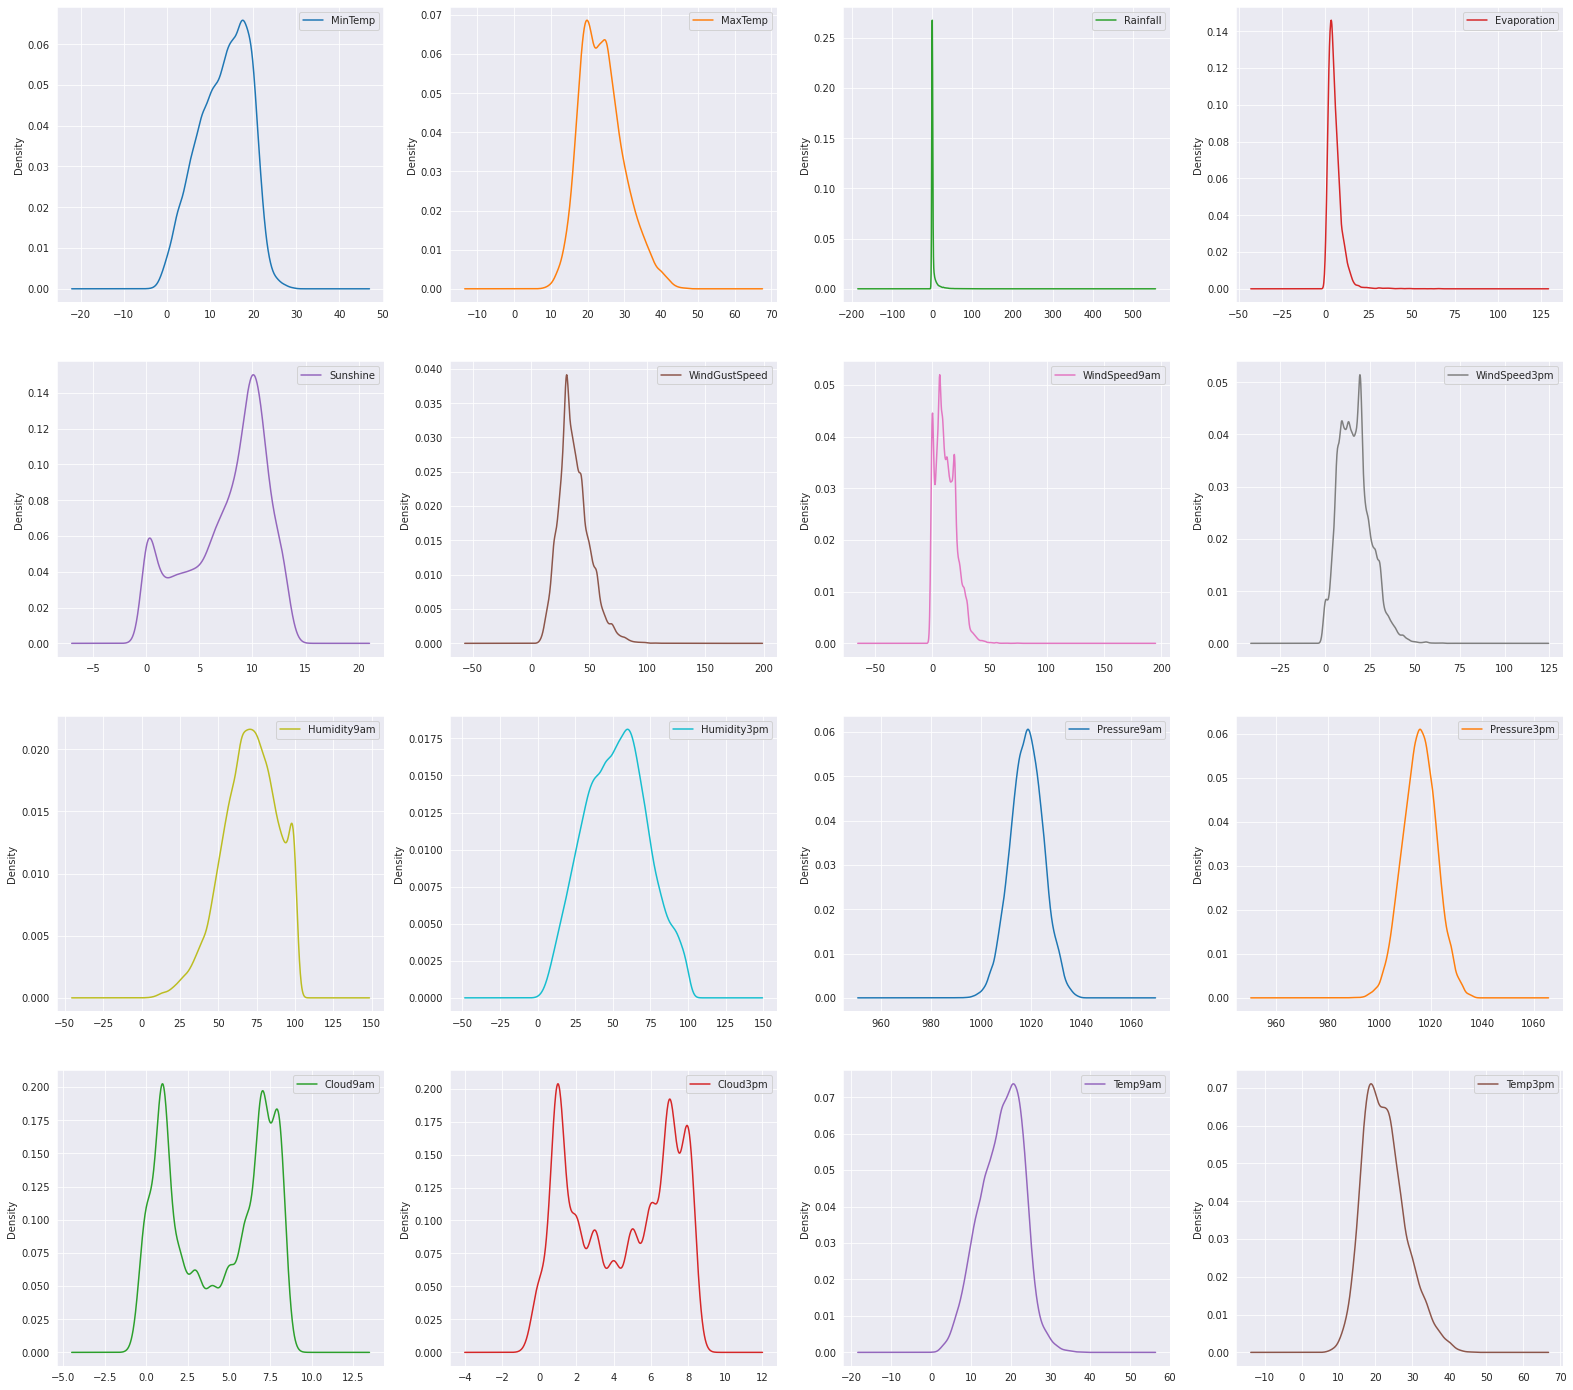

In [17]:
data.plot(kind="kde", subplots=True, layout=(4,4), figsize=(27,25),sharex=False, sharey=False);

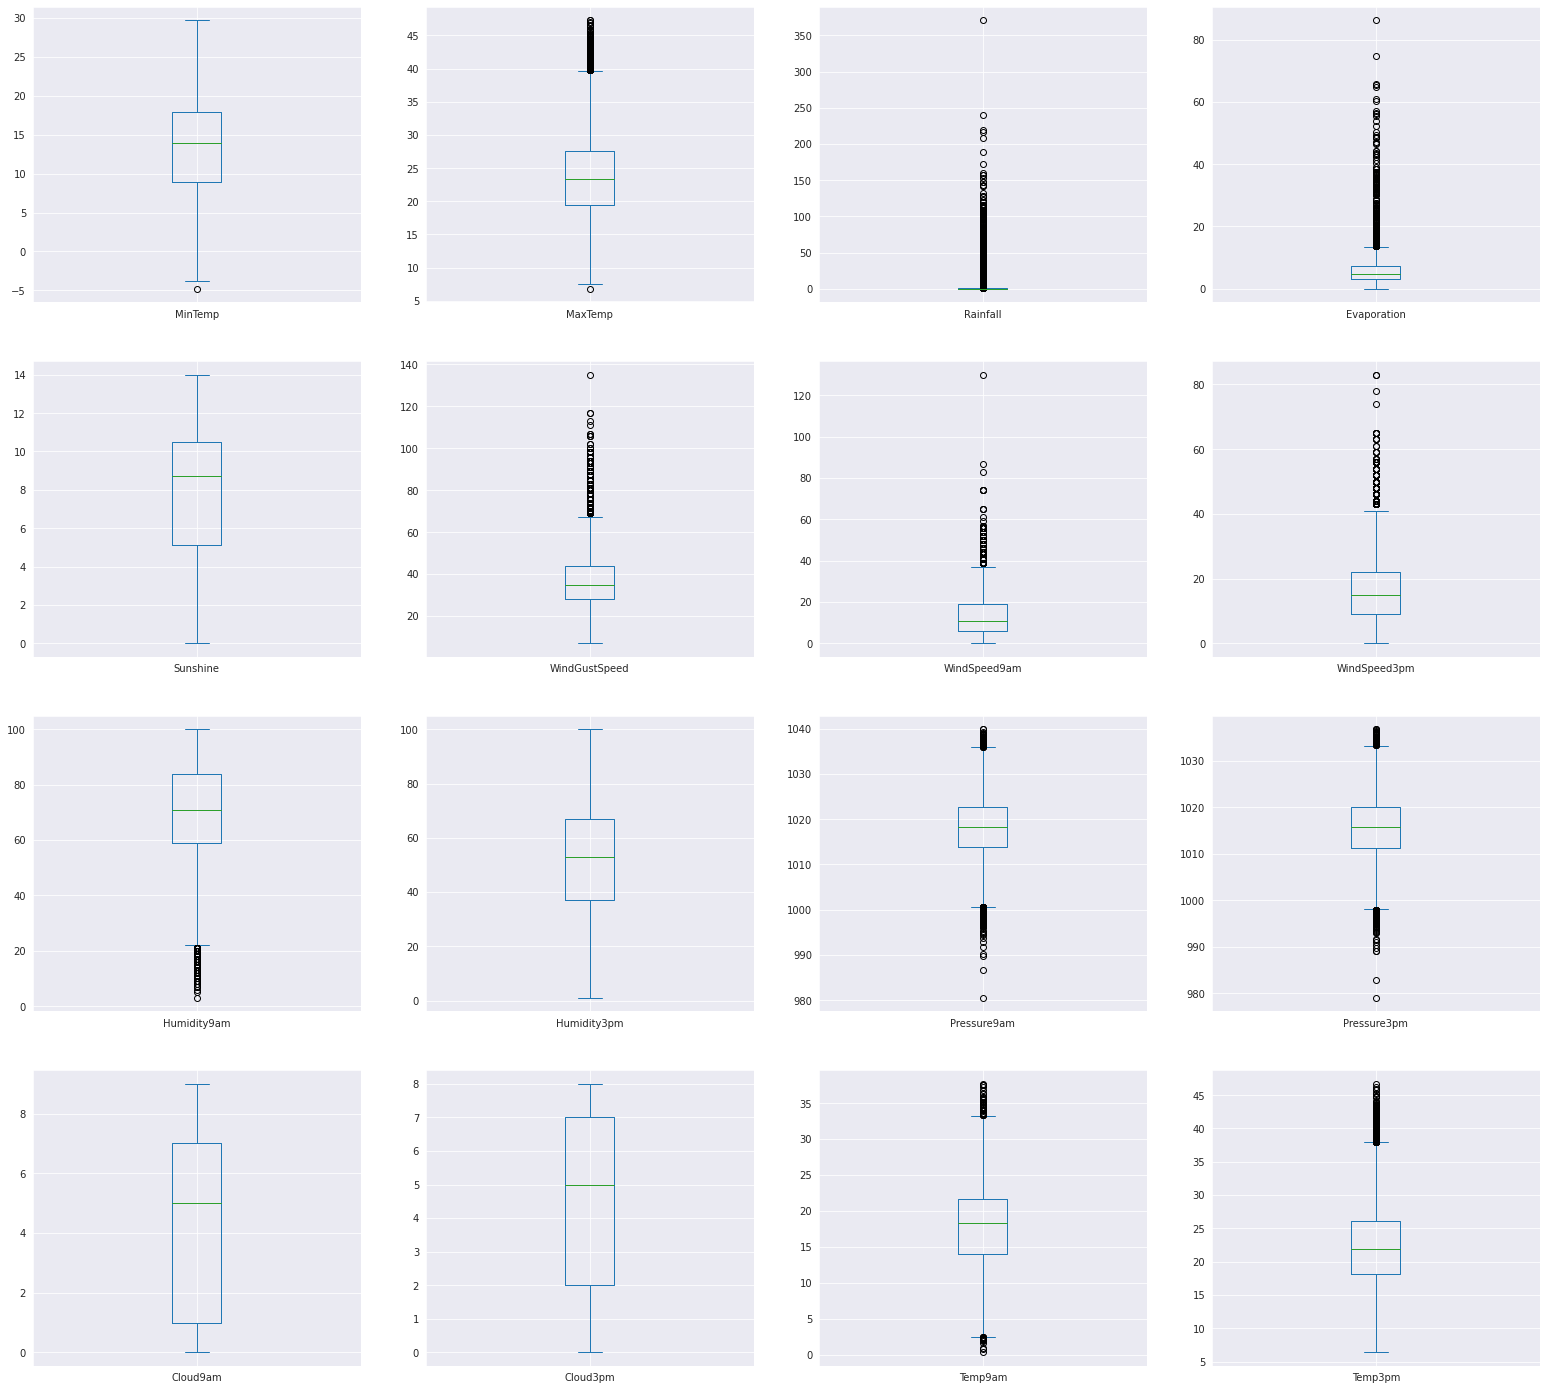

In [18]:
data.plot(kind="box", subplots=True, layout=(4,4), figsize=(27,25),sharex=False, sharey=False);

In [19]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.657588,0.108490,0.374314,-0.097804,0.332673,0.272035,0.226487,-0.096297,0.186825,-0.445695,-0.407737,0.167300,0.162389,0.893152,0.620656
MaxTemp,0.657588,1.000000,-0.092492,0.539787,0.365246,0.186471,0.003506,0.041640,-0.348344,-0.431386,-0.377854,-0.445800,-0.226295,-0.159538,0.826921,0.979709
Rainfall,0.108490,-0.092492,1.000000,-0.072725,-0.262383,0.151971,0.125546,0.064730,0.236936,0.267279,-0.115617,-0.074635,0.214812,0.169885,0.005746,-0.095964
Evaporation,0.374314,0.539787,-0.072725,1.000000,0.251108,0.188402,0.161277,0.032140,-0.413023,-0.336076,-0.238095,-0.252252,-0.126584,-0.065434,0.462381,0.526425
Sunshine,-0.097804,0.365246,-0.262383,0.251108,1.000000,-0.112217,-0.045927,0.005103,-0.527770,-0.594890,0.006372,-0.037320,-0.735990,-0.714539,0.167495,0.392271
WindGustSpeed,0.332673,0.186471,0.151971,0.188402,-0.112217,1.000000,0.542784,0.688289,-0.251293,0.002232,-0.441667,-0.404263,0.037268,0.091605,0.329593,0.140681
WindSpeed9am,0.272035,0.003506,0.125546,0.161277,-0.045927,0.542784,1.000000,0.491891,-0.313093,0.040462,-0.174988,-0.110144,-0.019534,0.048182,0.217472,-0.008027
WindSpeed3pm,0.226487,0.041640,0.064730,0.032140,0.005103,0.688289,0.491891,1.000000,-0.193304,0.056279,-0.283956,-0.232623,0.007239,-0.011175,0.225611,0.011952
Humidity9am,-0.096297,-0.348344,0.236936,-0.413023,-0.527770,-0.251293,-0.313093,-0.193304,1.000000,0.619707,0.155745,0.167755,0.499906,0.361769,-0.351790,-0.344654
Humidity3pm,0.186825,-0.431386,0.267279,-0.336076,-0.594890,0.002232,0.040462,0.056279,0.619707,1.000000,0.037180,0.110553,0.515926,0.504426,-0.062485,-0.491416


In [20]:
# Heat-map
cor=data.corr()

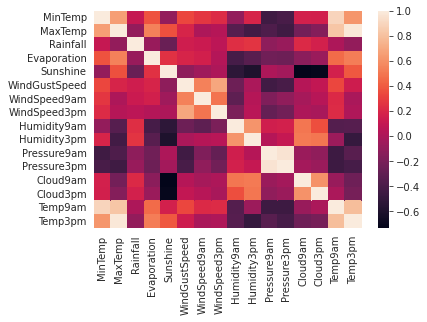

In [21]:
sns.heatmap(data=cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

# Preprocessing

In [22]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            499
MaxTemp            370
Rainfall           687
Evaporation      19072
Sunshine         23517
WindGustDir       4867
WindGustSpeed     4863
WindDir9am        4468
WindDir3pm        2100
WindSpeed9am       829
WindSpeed3pm      1475
Humidity9am        666
Humidity3pm       1330
Pressure9am       6684
Pressure3pm       6680
Cloud9am         15811
Cloud3pm         16140
Temp9am            437
Temp3pm           1105
RainToday          687
RainTomorrow       687
dtype: int64

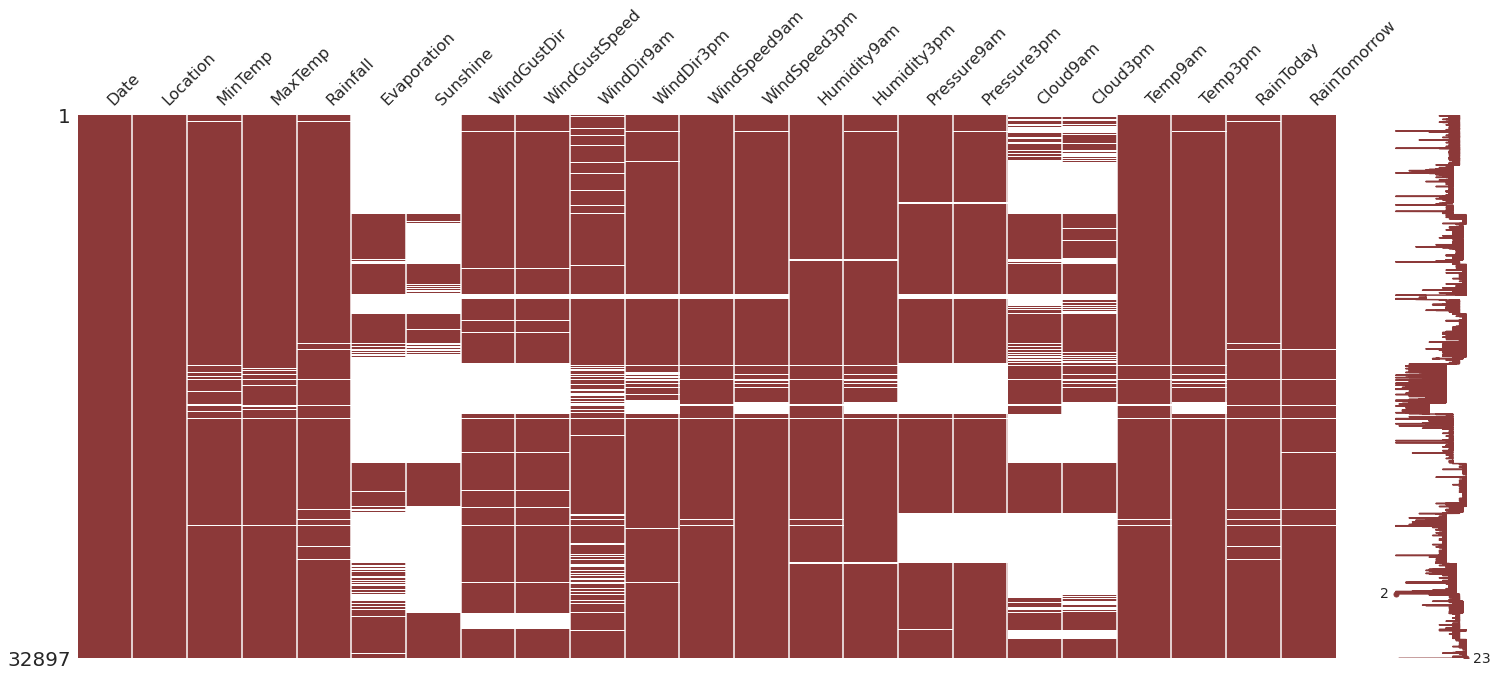

In [23]:
# Dealing with missing values
import missingno as msno
msno.matrix(data,color=(0.55,0.225,0.225),fontsize=16)

In [24]:
#Removing columns with more than 20% missing values and segregatting cat and num variables
data_cat=data[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
data.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.drop(columns=['RainToday','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [25]:
#Filling the missing data of numeric variables with mean
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [26]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No


In [27]:
#columns segregation
date_columns = ['Date']
categ_columns = data.select_dtypes(include=['object']).columns
num_columns = data.select_dtypes(include=['float64', 'int64']).columns
target_col = 'RainTomorrow'

In [28]:
categ_columns

Index(['Date', 'Location', 'RainTomorrow'], dtype='object')

In [29]:
for i in categ_columns:
    print('Unique Values in ' + i + ' Column:', end = " ")
    print(len(data[i].unique()))
    print('-----------------------------------------------------')

Unique Values in Date Column: 3344
-----------------------------------------------------
Unique Values in Location Column: 11
-----------------------------------------------------
Unique Values in RainTomorrow Column: 3
-----------------------------------------------------


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Location']:
    data[i] = le.fit_transform(data[i])
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,2008-12-02,0,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,2008-12-03,0,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,2008-12-04,0,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,2008-12-05,0,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No


In [31]:
data[['RainTomorrow']].value_counts()

RainTomorrow
No              25050
Yes              7160
dtype: int64